<a href="https://colab.research.google.com/github/zdwhite/Thinkful-Unit-4/blob/master/Unit_4_Lesson_2_Drill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DRILL: Mo' blobs, mo' problems?
You've seen how these three methods work on three blobs of reasonably separated data. 
*  Now go back and change the data.
*  Create more or fewer blobs, 
  *  Set the blobs closer together or farther apart. 
*  Set up at least three different blob configuations, then run the four methods:
  * 𝑘 -means
  * Mean shift
  * Spectral clustering
  *  Affinity propagation
* Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

In [0]:
##Imports
## Standard toolkit
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Make Data
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

#Pre-Processing
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

#Clustering Algos
# k-means,Mean-Shift, Spectral, Affinity
from sklearn.cluster import KMeans,MeanShift, estimate_bandwidth,SpectralClustering,AffinityPropagation

#Metrics
from sklearn import metrics

#import cycle
from itertools import cycle

In [0]:
# Make some random clusters0
  # Random number of clusters
#np.random.randint(10, size=1)

#Define a function that will make a random number of clusters between 1 and 10
  #Based on the returned random int make n cluster centers between -10 and 10

  
#https://stackoverflow.com/questions/36901/what-does-double-star-asterisk-and-star-asterisk-do-for-parameters
  
def rnd_cnfg(random_state):
    np.random.seed(random_state)
    n_blobs=np.random.randint(3,10, size=1)
    centers=np.random.randint(-10,10, size=(2,n_blobs[0]))
    return (centers.T,random_state)

# Use rnd__cnfg to make random blobs of data
def blobs(centers,random_state):
    X,y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=random_state)
    return (X, y,random_state)

# Both graph the randomized blobs and return the test train split data
def TTS_grph_blobs(X,y,random_state):
    plt.title('Original Clusters {}'.format(len(rnd_cnfg(random_state)[0])))
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.jet)
    plt.show()
    X_train, X_test, y_train, y_test = train_test_split(
      X,
      y,
      test_size=0.9,
     random_state=random_state)
    return (X_train, X_test, y_train, y_test,random_state)


  
  

In [0]:
#All the Modeling stuff

#Mean Shift modeling function
def K_means(X_train, X_test, y_train, y_test,random_state):
  #X_norm = normalize(X_train)
  #X_pca = PCA(2).fit_transform(X_norm)
  #X_pca = X_norm
  y_pred = KMeans(n_clusters=len(rnd_cnfg(random_state)[0]), random_state=random_state).fit_predict(X_train)
  # Plot the solution.

  plot = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred,cmap=plt.cm.jet)
  return plot
              
  
def mean_shift(X_train, X_test, y_train, y_test):
  bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
  ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
  ms.fit(X_train)
  labels = ms.labels_
  cluster_centers = ms.cluster_centers_
  n_clusters_ = len(np.unique(labels))
  #print("\nNumber of estimated clusters: {}".format(n_clusters_))
  plot = plt.scatter(X_train[:, 0], X_train[:, 1], c=labels,cmap=plt.cm.jet)
  return plot

  
#Spectral_clustering Function
def spect_clust(X_train, X_test, y_train, y_test,random_state):
  # This is a bit inefficient as we have to re-run our previous function, but it'll do
  n_clusters=len(rnd_cnfg(random_state)[0])

  # Declare and fit the model.
  sc = SpectralClustering(n_clusters=n_clusters)
  sc.fit(X_train)

  #Predicted clusters.
  predict=sc.fit_predict(X_train)

  #Graph results.
  
  plot = plt.scatter(X_train[:, 0], X_train[:, 1], c=predict,cmap=plt.cm.jet)
  return plot
  

# Prop_affinity function  
def pro_af(X_train, X_test, y_train, y_test):
  af = AffinityPropagation().fit(X_train)

  # Pull the number of clusters and cluster assignments for each data point.
  cluster_centers_indices = af.cluster_centers_indices_
  n_clusters_ = len(cluster_centers_indices)
  labels = af.labels_
  #print('Estimated number of clusters: {}'.format(n_clusters_))
  
  plt.figure(1)
  plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
  colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
  for k, col in zip(range(n_clusters_), colors):
      class_members = labels == k
      cluster_center = X_train[cluster_centers_indices[k]]
      plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
      plt.plot(cluster_center[0],
              cluster_center[1],
               'o',
               markerfacecolor=col,
              markeredgecolor='k')
      for x in X_train[class_members]:
         plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
  
  plt.title('\nEstimated number of clusters with Propagation Affinity: {}'.format(n_clusters_))
  plt.show()
  
  
def all_models(X_train, X_test, y_train, y_test,random_state):
  plt.figure(1,figsize=(15,5))
  plt.subplot(131)
  plt.title('K-Means Solution')
  K_means(X_train, X_test, y_train, y_test,random_state)
  plt.subplot(132)
  plt.title('Mean Shift Model')
  mean_shift(X_train, X_test, y_train, y_test)
  plt.subplot(133)
  plt.title('\nSpectral Cluster Model')
  spect_clust(X_train, X_test, y_train, y_test,random_state)
  plt.show()
  pro_af(X_train, X_test, y_train, y_test)


In [0]:
# The Homework
np.random.seed(42)
randomstate = pd.Series(np.random.randint(1,1000,size=(4)),dtype='int32')


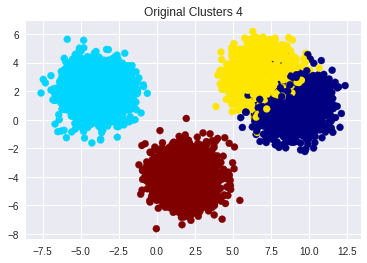

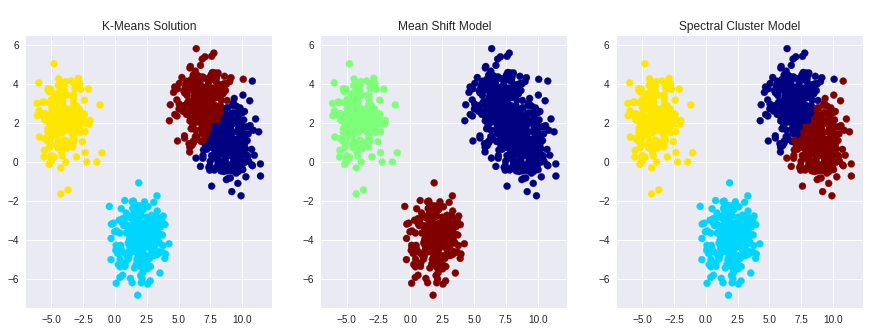

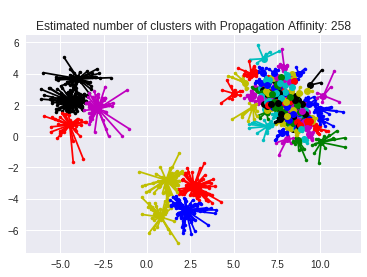

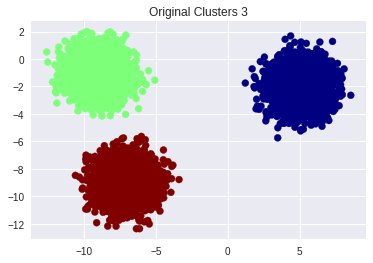

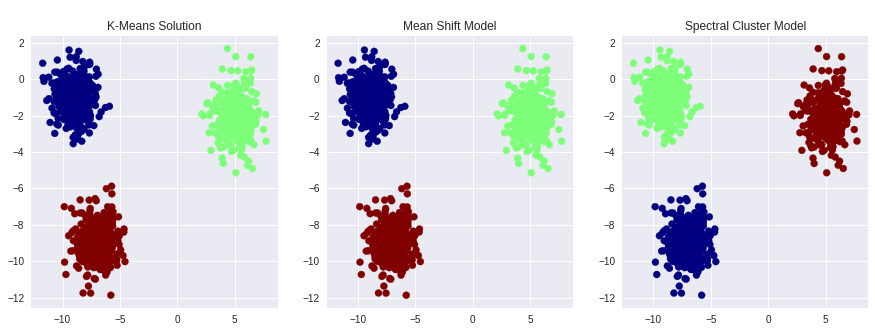

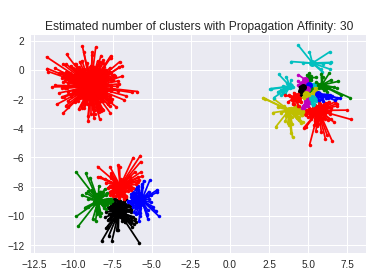

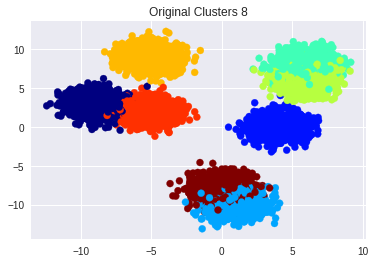

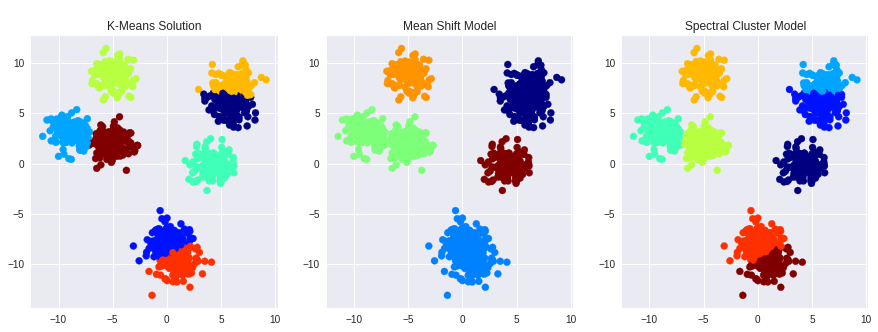

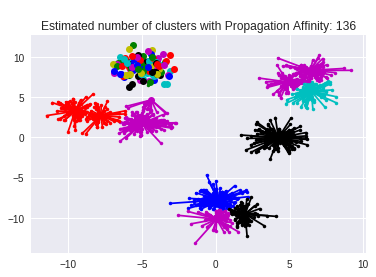

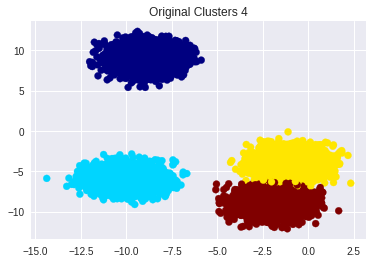

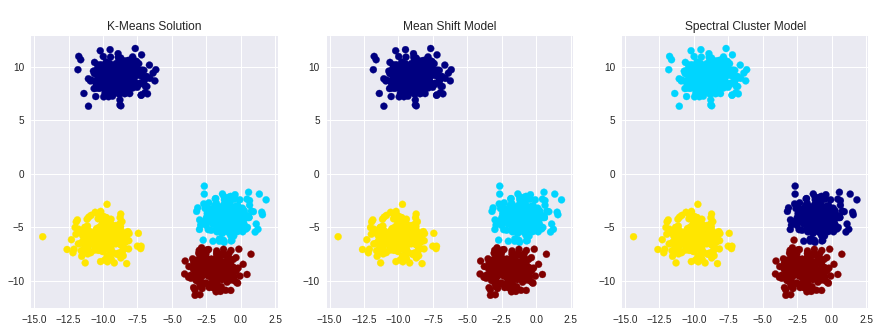

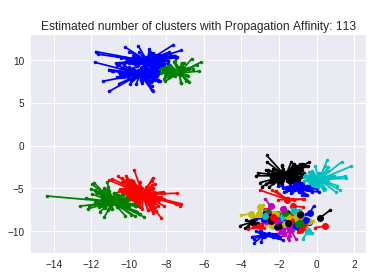

0    None
1    None
2    None
3    None
dtype: object

In [21]:
randomstate.apply(lambda x : all_models(*TTS_grph_blobs(*blobs(*rnd_cnfg(x)))))